# Diamond price prediction

This project aims to predict the price of diamonds based on several physical and qualitative attributes using a machine learning model. The dataset includes various features that impact the value of a diamond, such as carat (weight), cut (quality), color (from J to D), clarity (from I1 to IF), and physical dimensions like length (x), width (y), depth (z), depth percentage, and table width. By analyzing these features, the model will predict the price of the diamond, which ranges from $326 to $18,823.

This project leverages exploratory data analysis, feature engineering, and machine learning techniques to build an accurate predictive model that can estimate diamond prices, providing insights for pricing strategies in the gemstone market.

In [92]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [93]:
#import dataset as pandas dataframe
df=pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [94]:
df.shape

(50000, 10)

In [95]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [96]:
df.duplicated().sum()

126

In [97]:
data=df.drop_duplicates()

In [98]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49874 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49874 non-null  float64
 1   cut      49874 non-null  object 
 2   color    49874 non-null  object 
 3   clarity  49874 non-null  object 
 4   depth    49874 non-null  float64
 5   table    49874 non-null  float64
 6   price    49874 non-null  int64  
 7   x        49874 non-null  float64
 8   y        49874 non-null  float64
 9   z        49874 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ MB


In [100]:
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data Visualizations

#### Distribution of diamond prices

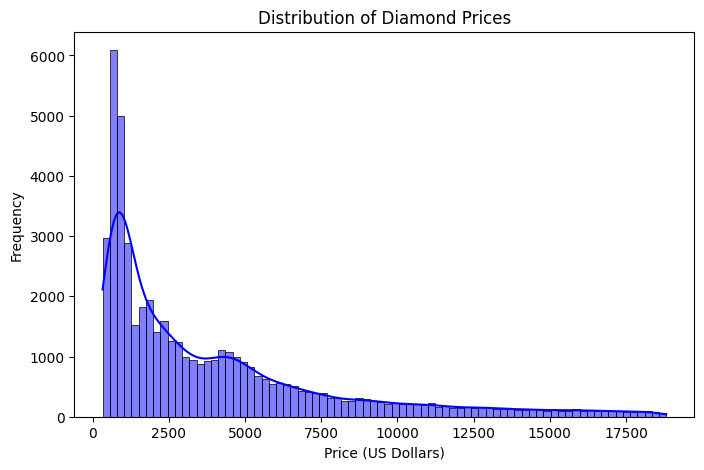

In [101]:
plt.figure(figsize=(8,5))
sns.histplot(data['price'], kde=True, color='blue')
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price (US Dollars)')
plt.ylabel('Frequency')
plt.show()

#### Relationship Between Carat and Price

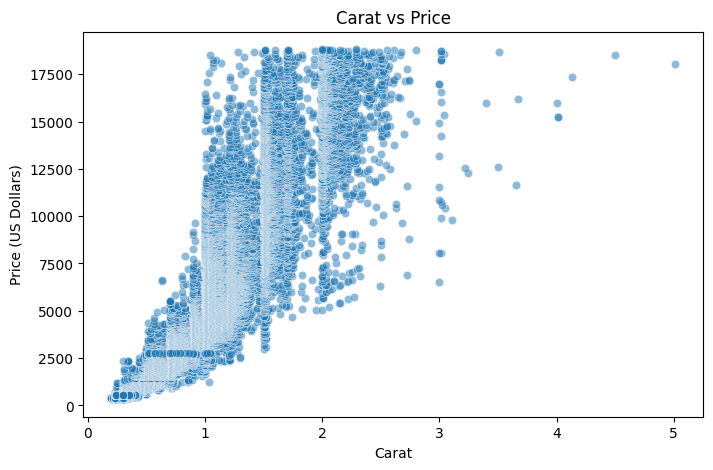

In [102]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='carat', y='price', data=data, alpha=0.5)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price (US Dollars)')
plt.show()

#### Boxplot of Price by Cut

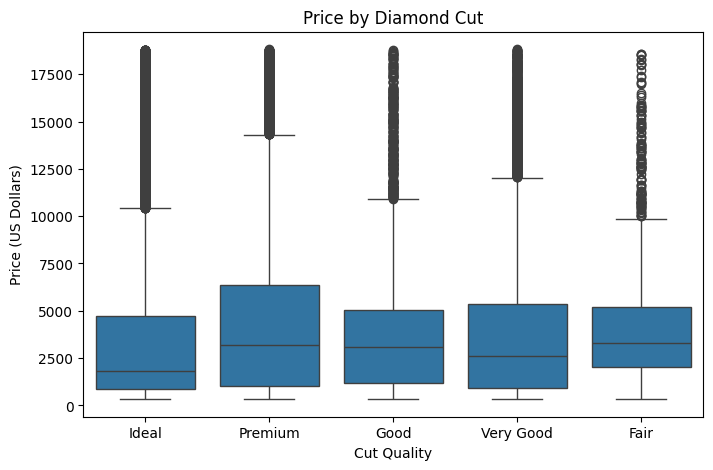

In [103]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cut', y='price', data=data)
plt.title('Price by Diamond Cut')
plt.xlabel('Cut Quality')
plt.ylabel('Price (US Dollars)')
plt.show()

#### Price by Color

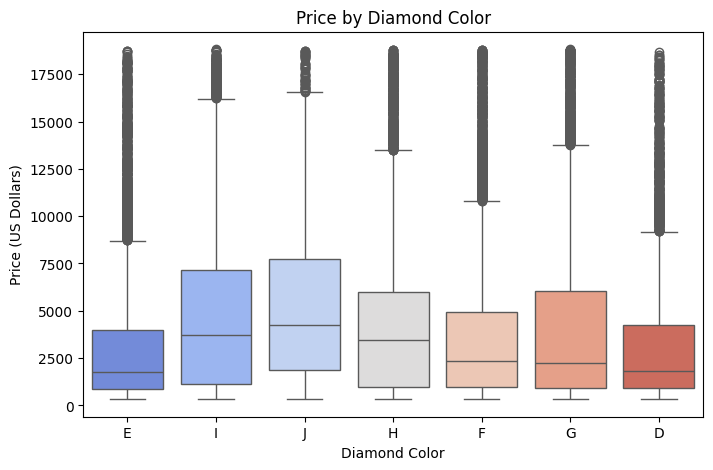

In [104]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='color', y='price', data=data, palette='coolwarm')
plt.title('Price by Diamond Color')
plt.xlabel('Diamond Color')
plt.ylabel('Price (US Dollars)')
plt.show()

#### Price by Clarity

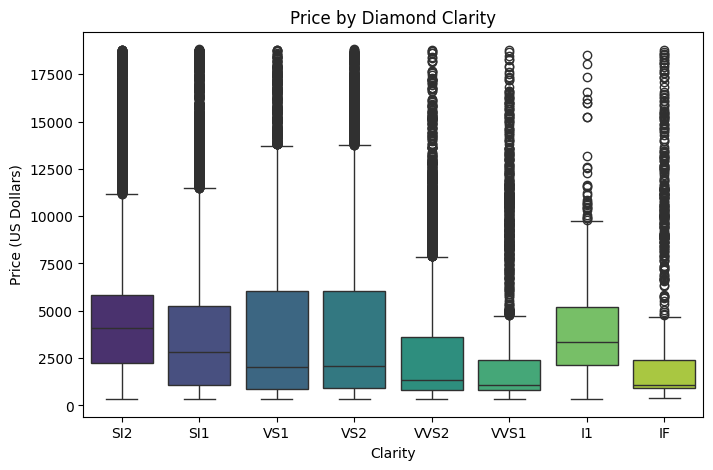

In [105]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='clarity', y='price', data=data, palette='viridis')
plt.title('Price by Diamond Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price (US Dollars)')
plt.show()

## Conclusions from visualization

1. Distribution of Diamond Prices
Observation: The distribution of diamond prices is highly right-skewed, indicating that most diamonds in the dataset are priced at the lower end (below $5,000), with a few very expensive diamonds priced much higher.
Finding: The market likely has a higher demand for more affordable diamonds, and fewer diamonds are priced in the luxury category.

2. Relationship Between Carat and Price
Observation: There is a clear positive relationship between carat and price. As the carat (weight) of the diamond increases, the price tends to rise, although the increase is not strictly linear.
Finding: Carat is a strong determinant of diamond price, with larger diamonds generally commanding higher prices. However, the price variation for diamonds of similar carat weights suggests other factors (like cut, color, and clarity) also influence pricing.

3. Boxplot of Price by Cut
Observation: The median price of diamonds increases with the quality of the cut, from Fair to Ideal. However, the price variance within each cut category can be significant.
Finding: Diamonds with better cuts (like Premium and Ideal) generally fetch higher prices, indicating that cut quality plays an important role in price determination. Still, within each cut category, prices can vary widely depending on other factors.

4. Price by Color
Observation: Diamonds with better color grades (closer to D) tend to have higher median prices, though the price difference is not as pronounced as with cut quality. Some overlap in price distributions occurs across different color grades.
Finding: While diamond color impacts price, the effect is less substantial compared to other factors like carat or cut. This suggests that consumers may not place as much emphasis on color as they do on other attributes.

5. Price by Clarity
Observation: Diamonds with higher clarity grades (like IF and VVS1) tend to be priced higher, but the overall variation within each clarity category is considerable.
Finding: Clarity affects diamond pricing, with clearer diamonds (fewer inclusions) generally costing more. However, the wide price variance within clarity categories suggests that clarity alone may not be the sole driver of price differences.

## Data Processing for model building

#### encoding ordinal values

In [106]:
from sklearn.preprocessing import OrdinalEncoder

# Defining the order for each ordinal categorical feature
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order])

data[['cut', 'color', 'clarity']] = encoder.fit_transform(data[['cut', 'color', 'clarity']])

In [107]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75


#### Normalizations

In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Features to scale
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

#### Train-Test SplitTrain-Test Split

In [109]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
lr_model = LinearRegression()

In [112]:
lr_model.fit(X_train, y_train)

# Predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Model evaluation
print('Train RMSE:', mean_squared_error(y_train, y_pred_train, squared=False))
print('Test RMSE:', mean_squared_error(y_test, y_pred_test, squared=False))
print('R² Score:', r2_score(y_test, y_pred_test))

Train RMSE: 1217.2167246581892
Test RMSE: 1220.6192606249244
R² Score: 0.9051412400569623


- Linear regression model showing high level of accuracy of 90.51 %

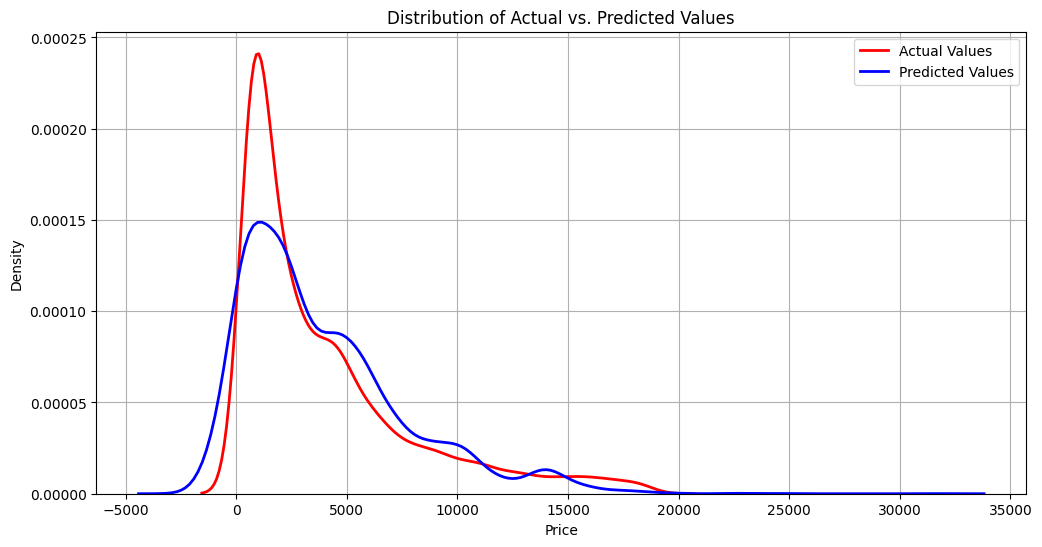

In [113]:
plt.figure(figsize=(12, 6))

# Plotting the KDE of actual values
sns.kdeplot(y_test, color='r', label='Actual Values', linewidth=2)

# Plotting the KDE of predicted values
sns.kdeplot(y_pred_test, color='b', label='Predicted Values', linewidth=2)

# Adding labels and title
plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

### Random Forest Regressor

In [114]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Model evaluation
print('Train RMSE:', mean_squared_error(y_train, y_pred_train, squared=False))
print('Test RMSE:', mean_squared_error(y_test, y_pred_test, squared=False))
print('R² Score:', r2_score(y_test, y_pred_test))

Train RMSE: 202.9190184417962
Test RMSE: 549.9768662314119
R² Score: 0.9807422364541818


- Random forest have high accuracy of 98 %

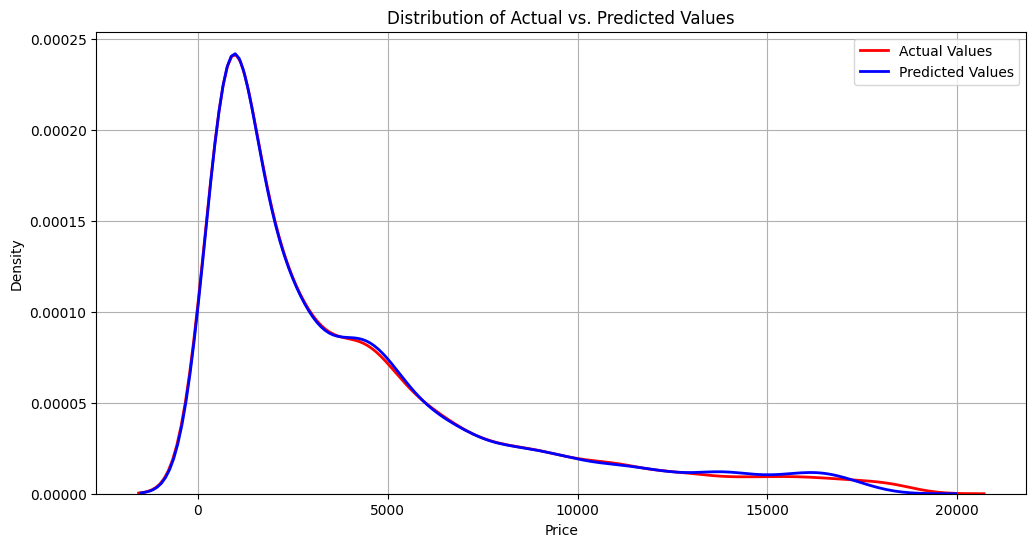

In [115]:
plt.figure(figsize=(12, 6))

# Plotting the KDE of actual values
sns.kdeplot(y_test, color='r', label='Actual Values', linewidth=2)

# Plotting the KDE of predicted values
sns.kdeplot(y_pred_test, color='b', label='Predicted Values', linewidth=2)

# Adding labels and title
plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

### Conclusion

- Random forest regressor have a very similar prediction with original values
- Carat (weight) has the most direct and significant influence on price.
- Cut quality significantly affects the price, with better cuts fetching higher prices.
- Color and clarity have moderate influences on price but are not as impactful as carat or cut.
